In [10]:
import matplotlib.pyplot as plt

from Modules.ShapeShadow import Sector
from Modules.Beamer import MapPattern, Spot, SpotCollection

In [11]:
# Setting up dummy coordinates for the MapPattern
r_pattern = 3.8811
sector = Sector(
    radius=r_pattern,
    angle_sweep=90
)
sector.rotate(225)

# Sample outline
sample = Sector(
    radius=2*2.54,
    angle_sweep=90
)
sample.rotate(225 + 4.1).translate(-0.0542, 2.8507)

# Spot
a_inc = 75
spot = Spot(diameter=0.3, angle_incident=a_inc)
print(f"Spot minor: {spot.diameter:.2f} cm, major: {spot.elongation():.2f} cm")

# MapPattern
xoff = 0.0474
yoff = 1.9750
toff = 4.1
mp = MapPattern(sector.x, sector.y, x_offset=-xoff, y_offset=yoff, theta_offset=toff)

# SpotCollection
sc = SpotCollection(mp, spot)

Spot minor: 0.30 cm, major: 1.16 cm


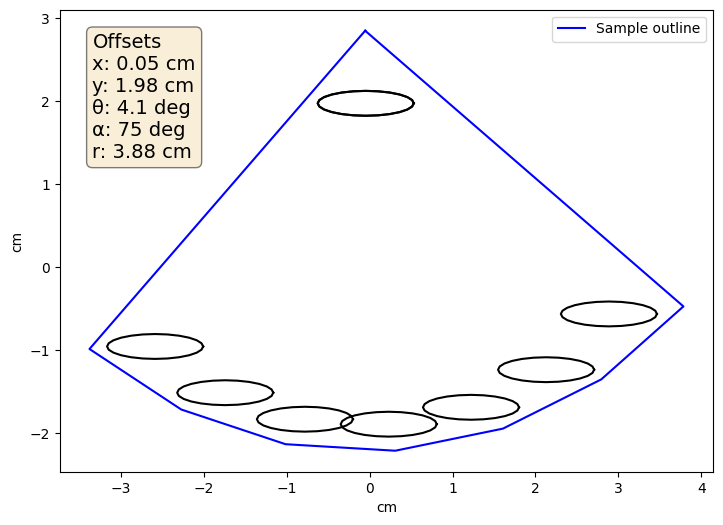

In [17]:
s = 3
fig, ax = plt.subplots(figsize=(3*s,2*s))
ax.plot(sample.x, sample.y, '-b', label='Sample outline')

for ell in sc.outlines():
    ax.plot(ell.x, ell.y, '-k')


ax.set_xlabel('cm')
ax.set_ylabel('cm')

textstr = '\n'.join((
    "Offsets",
    f"x: {xoff:.2f} cm",
    f"y: {yoff:.2f} cm",
    f"\u03B8: {toff:.1f} deg",
    f"\u03B1: {a_inc:.0f} deg",
    f"r: {r_pattern:.2f} cm")
)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=14,
    verticalalignment='top', bbox=props)

ax.set_aspect("equal")

plt.legend()
plt.show()